## Sample Segmentation

In [328]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

from scipy import stats
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

In [329]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [330]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [331]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [332]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [333]:
dummy_df = pd.get_dummies(df[['gender','Partner','Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling']])

In [334]:
dummy_df.shape

(7043, 34)

In [335]:
df[['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].shape

(7043, 6)

In [336]:
df = pd.concat((df[['Churn','customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']],dummy_df), axis=1)

In [337]:
df.TotalCharges = df.TotalCharges.str.replace(' ','')

In [338]:
df.columns

Index(['Churn', 'customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes'],
      

In [339]:
df.TotalCharges.sort_values()

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [340]:
df.TotalCharges.str.contains(' ').sum()

0

In [341]:
df.loc[df.TotalCharges=='' ,'TotalCharges'] = df.MonthlyCharges

In [342]:
df.TotalCharges = df.TotalCharges.astype('float')

## Building a Spend and Tenure Segmentation Scheme

Let's say, hypothetically, that we want to segment our audience based on the amount they are spending. We want to create these buckets in order to segment these users for a targeting campaign. In order to do this, we can think about leveraging a variety of clustering algorithms. We'll start with a simple exercise of clustering based on TotalSpend leveraging K-Means. To determine the appropriate number of clusters, we'll look at the inertia score at each level of k. This represents how far away points within a cluster are from the centroid of said cluster. A smaller value here is more optimal.

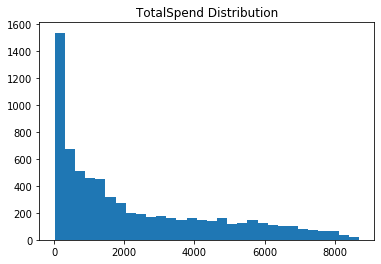

In [343]:
plt.title('TotalSpend Distribution')
plt.hist(df.TotalCharges, bins=30);

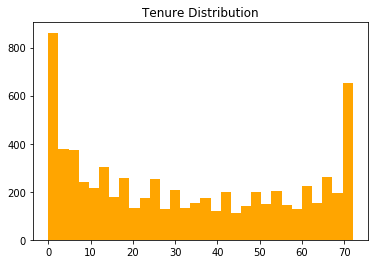

In [344]:
plt.title('Tenure Distribution')
plt.hist(df.tenure, bins=30, color='orange');

In [345]:
df[['TotalCharges','tenure']].describe()

,TotalCharges,tenure
count,7043.000000,7043.000000
mean,2279.798992,32.371149
std,2266.730170,24.559481
min,18.800000,0.000000
25%,398.550000,9.000000
50%,1394.550000,29.000000
75%,3786.600000,55.000000
max,8684.800000,72.000000


Let's start with KMeans and assess the number of clusters we need based on an elbow plot of the intertia

### Kmeans

Text(0.5, 1.0, 'Silhouette Score over k')

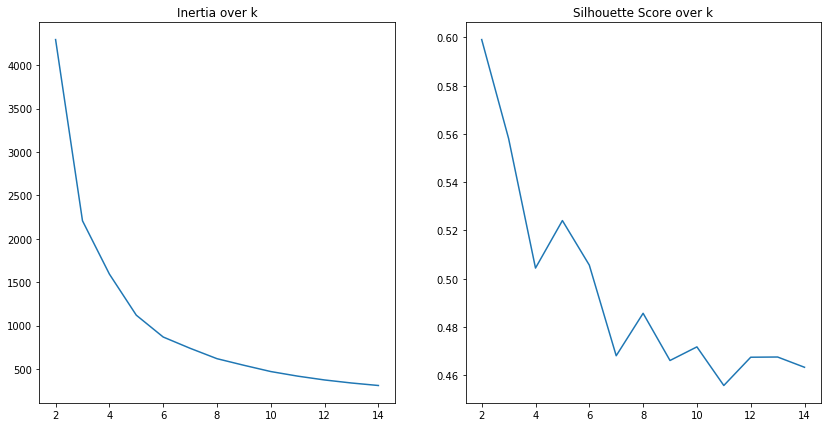

In [346]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import warnings

df_charges = df[['TotalCharges', 'tenure']]
sc = StandardScaler()
df_sc = pd.DataFrame(sc.fit_transform(df_charges))

with warnings.catch_warnings():
    warnings.simplefilter("ignore") 
    
    scores = []
    for k in range(2, 15):
        cl = KMeans(n_clusters=k)
        cl.fit(df_sc)
        inertia = cl.inertia_
        sil = silhouette_score(df_sc, cl.labels_)
        scores.append([k, inertia, sil])

score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']
    
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k')

Based on these elbow plots, we surmise that **6** clusters is a good amount.

### Assessing the same segmentation using DBSCAN

In [347]:

scores = []

cl = DBSCAN(eps=0.3,min_samples=100)
cl.fit(df_sc)
sil = silhouette_score(df_sc, cl.labels_)

In [348]:
print(sil)

0.09435361253136473


Here we see the silhouette score is noticeably worse for our DBScan model. DBScan's algorithm is density based, and as a result a uniform density distribution may be the culprit. We can look at a scatterplot of our scaled tenure and TotalCharges variables to see if this is indeed the case.

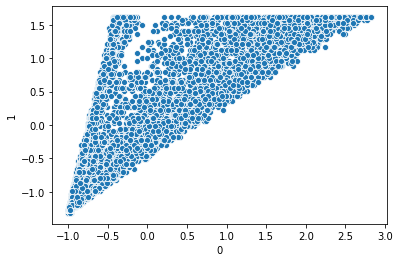

In [349]:
sns.scatterplot(df_sc[0], df_sc[1]);

As you can see from the above, there is uniformity in the density of our points. K-means is the superior choice in this particular use case if we are looking to develop this particular segment.

### Verifying our K-Means Clusters Visually

In [350]:
kmeans = KMeans(n_clusters=6, max_iter=2000).fit(df_charges)
result_df = pd.DataFrame({'spend_ten_cluster':kmeans.predict(df_charges)})
df = pd.concat([df, result_df], axis=1)

## Create a dataframe for cluster_centers (centroids)
centroids = pd.DataFrame(
    sc.inverse_transform(kmeans.cluster_centers_),
    columns=["x1", "x2"]
)
centroids

,x1,x2
0,9.796537e+06,1346.599165
1,3.116853e+06,885.481611
2,6.833579e+05,240.725144
3,1.686119e+07,1731.030396
4,6.296590e+06,994.794217
5,1.327303e+07,1580.730764


<Figure size 504x504 with 0 Axes>

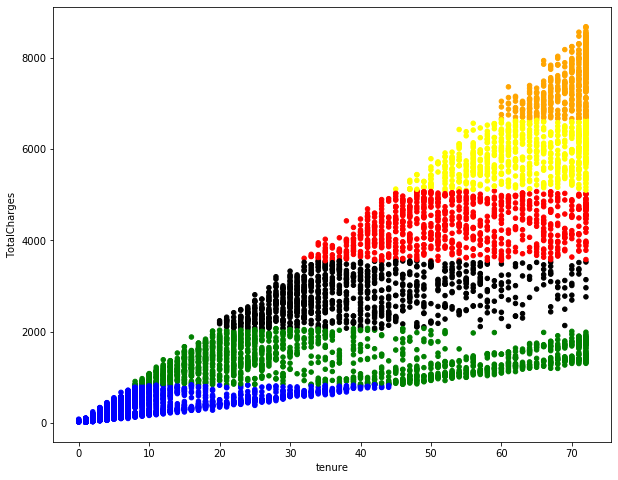

In [361]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue", "orange", "black", "yellow"];
df['color'] = df['spend_ten_cluster'].map(lambda p: colors[p]);

ax = df.plot(    
    kind="scatter", 
    x="tenure", y="TotalCharges",
    figsize=(10,8),
    c = df['color']
);


In [282]:
kmeans = KMeans(n_clusters=6, max_iter=2000).fit(df_charges)
result_df = pd.DataFrame({'spend_ten_cluster':kmeans.predict(df_charges)})

In [117]:
df.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
Churn,,,,,,,,,,,,,,,,,,,,,
No,0.128721,37.569965,61.265124,2549.999497,0.492656,0.507344,0.471782,0.528218,0.655199,0.344801,...,0.273096,0.335137,0.361036,0.273096,0.365868,0.356977,0.273096,0.369927,0.464438,0.535562
Yes,0.254682,17.979133,74.441332,1531.796094,0.502408,0.497592,0.642055,0.357945,0.825575,0.174425,...,0.060460,0.165864,0.504013,0.060460,0.435527,0.501873,0.060460,0.437667,0.250936,0.749064


In [133]:
indep_vars = list(df.columns.drop(['Churn', 'customerID']).values)

In [137]:
for x in indep_vars:
    print(x)
    print(stats.ttest_ind(df[df.Churn == 'No'][x],df[df.Churn == 'Yes'][x]))

SeniorCitizen
Ttest_indResult(statistic=-12.80786572603475, pvalue=3.8398600557847846e-37)
tenure
Ttest_indResult(statistic=31.57955051135377, pvalue=7.99905796059022e-205)
MonthlyCharges
Ttest_indResult(statistic=-16.53673801593631, pvalue=2.706645606888261e-60)
TotalCharges
Ttest_indResult(statistic=16.980809736114267, pvalue=2.057691578421339e-63)
gender_Female
Ttest_indResult(statistic=-0.7226734406634124, pvalue=0.46990453909804286)
gender_Male
Ttest_indResult(statistic=0.7226734406634041, pvalue=0.46990453909804797)
Partner_No
Ttest_indResult(statistic=-12.769496308938553, pvalue=6.2207311296211236e-37)
Partner_Yes
Ttest_indResult(statistic=12.769496308938553, pvalue=6.2207311296211236e-37)
Dependents_No
Ttest_indResult(statistic=-13.969585311427144, pvalue=9.14043298908963e-44)
Dependents_Yes
Ttest_indResult(statistic=13.96958531142715, pvalue=9.14043298908859e-44)
PhoneService_No
Ttest_indResult(statistic=1.0021309668860974, pvalue=0.31631478134316926)
PhoneService_Yes
Ttest_in